#### Necessary python imports

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
img = plt.imread('./data/Mona_Lisa.jpg')

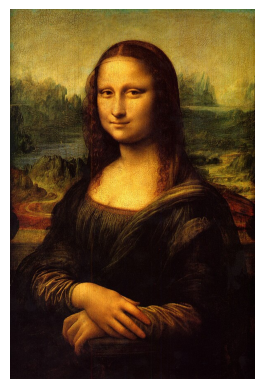

In [34]:
plt.axis('off')
plt.imshow(img)

In [45]:
height = img.shape[0]
width = img.shape[1]
print(height,width)

899 594 uint8


In [36]:
def shiftimg(img, tx):
    height, width, _ = img.shape
    shifted_img = np.zeros_like(img) 
    
    if tx > 0:        
        shifted_img[:, tx:, :] = img[:, :width-tx, :]
    elif tx < 0:
        shifted_img[:, :width+tx, :] = img[:, -tx:, :]
    else:
        shifted_img = img.copy()

    return shifted_img


[0.9018321326009997, 0.9081513746867558, 0.9143562240825924, 0.9207426144737458, 0.9275807740925015, 0.9342446654782461, 0.9403735172756986, 0.9485131556168451, 0.949774328477187, 0.9612200393570921, 1, 0.9614762229928053, 0.9502079973475219, 0.9491398070104965, 0.9412782544443283, 0.9353667090034742, 0.9288747044238117, 0.9222416536273965, 0.9160120039201705, 0.9099058749932729, 0.9037455664372968]


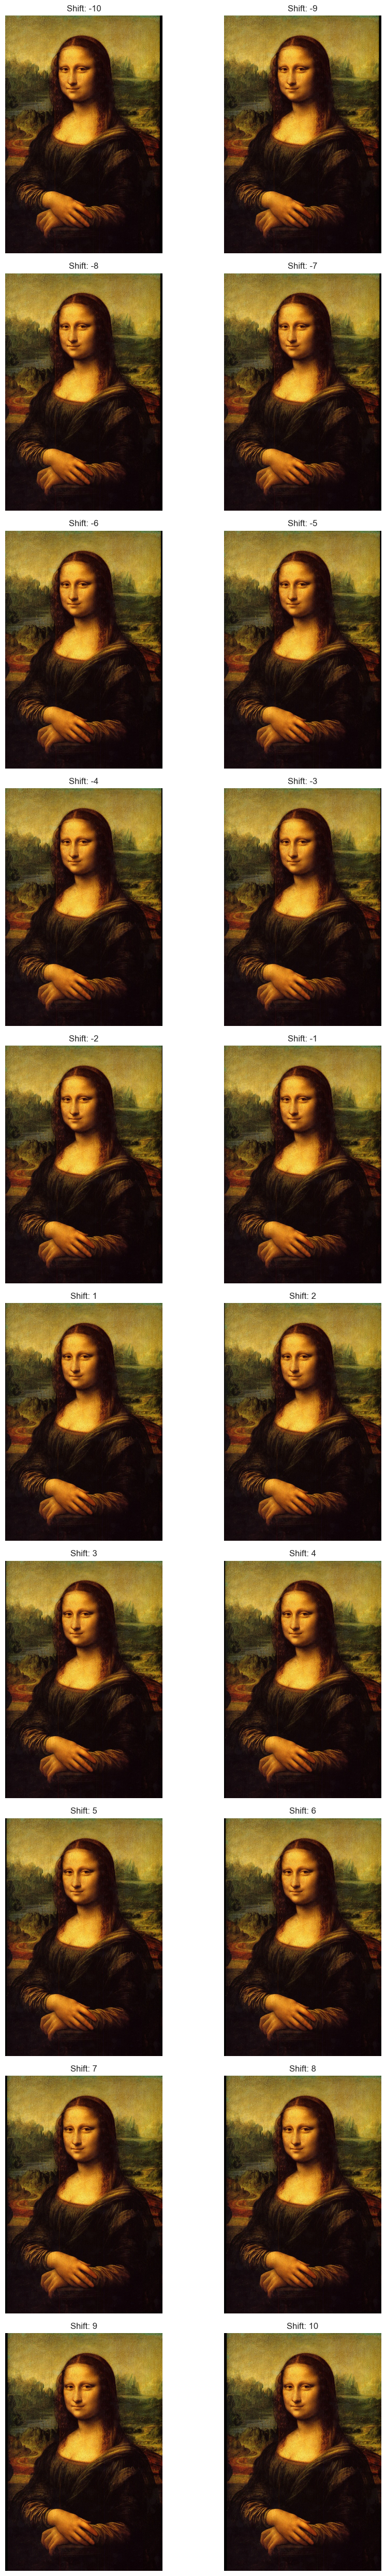

In [37]:

fig, ax = plt.subplots(10, 2, figsize=(10, 50))
correlation_list = []

for i, tx in enumerate(range(-10, 11)):
    if tx>0:
        i-=1
    if tx != 0:
        row, col = divmod(i, 2)  
        img_copy = img.copy()
        shifted_image = shiftimg(img_copy, tx)
        ax[row, col].imshow(shifted_image)
        ax[row, col].set_title(f'Shift: {tx}')
        ax[row, col].axis('off') 
        image1_flatten = shifted_image.flatten()
        image2_flatten = img_copy.flatten()
        correlation = np.corrcoef(image1_flatten, image2_flatten)[0, 1]
        correlation_list.append(correlation)
    if tx==0:
        correlation_list.append(1)
        
print(correlation_list)


plt.tight_layout()
plt.show()


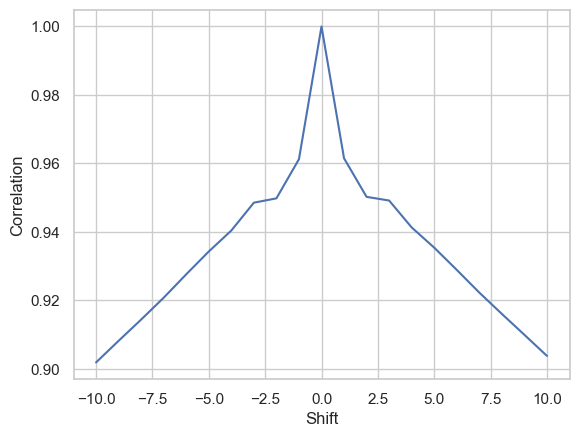

In [38]:
shifts = list(range(-10, 11))
plt.xlabel('Shift')
plt.ylabel('Correlation')
plt.plot(shifts,correlation_list)



In [39]:
total_pixels = width * height

def draw_hist(img, color):
    values = img[:,:,color]
    hist = np.zeros(256, dtype=int)
    for row in values:
        for pixel in row:
            hist[pixel]+=1
    normalized_histogram = [freq / total_pixels for freq in hist]

    plt.bar(list(range(0,256)), normalized_histogram, width=1, edgecolor='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensities')
    plt.show()
    


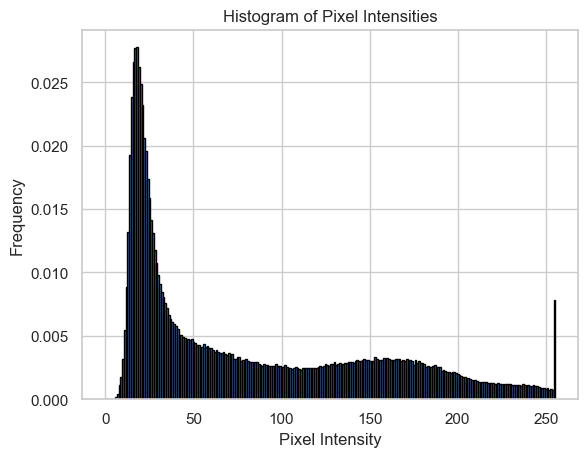

In [40]:
red_img = img.copy()
red_img[:,:,2] = 0
red_img[:,:,1] = 0
draw_hist(red_img,0)


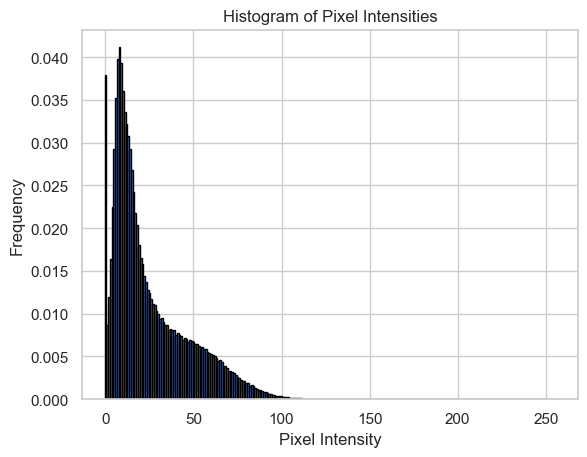

In [41]:
blue_img = img.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0
draw_hist(blue_img,2)


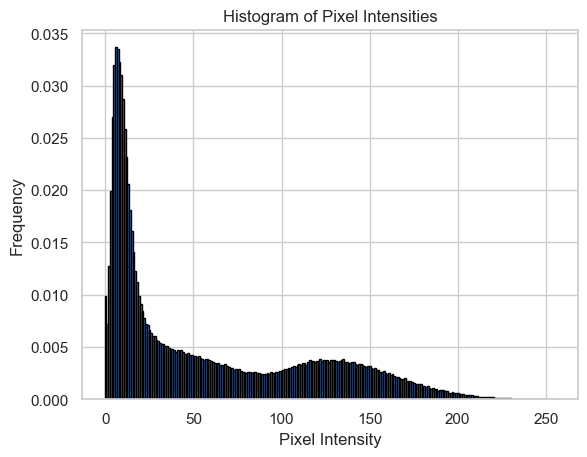

In [42]:
green_img = img.copy()
green_img[:,:,0] = 0
green_img[:,:,2] = 0
draw_hist(green_img,1)